# DATA ANALYSIS AND VISUALIZATION OF IPL (2008 - 2019)


## Installations

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import plotly as py
import cufflinks as cf

In [7]:
from plotly.offline import iplot

In [8]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Data Understanding

### 1. Matches Data 

In [9]:
matches = pd.read_csv('matches.csv', index_col='id', parse_dates=['date'])
#file read method.

In [10]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             749 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object 

In [12]:
matches.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


### 2. Deliveries Data

In [13]:
deliveries = pd.read_csv('deliveries.csv', index_col='match_id')

In [14]:
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

In [16]:
deliveries.describe()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# Wins and Loss Analysis and Venue Analaysis from 2008-2019 IPL

## 1. Venues

In [17]:
venues = matches['venue'].value_counts()
venues

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [18]:
venues.iplot(kind='bar', xTitle='No. of matches', yTitle='Venues',title='Venues (2008-2019)', orientation='h')

## 2. Overall result Analysis of all IPL matches from 2008-2019

In [19]:
winlost = matches['result'].value_counts()
values=[]
for key in winlost:
    values.append(key)
winlost

normal       743
tie            9
no result      4
Name: result, dtype: int64

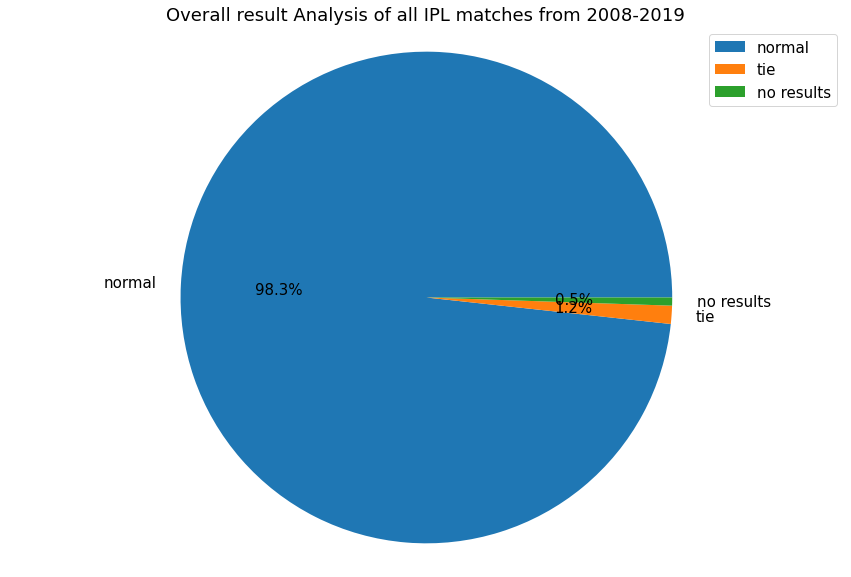

In [20]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(15,10))
plt.pie(values, labels=['normal','tie','no results'],  autopct='%2.1f%%')
plt.title('Overall result Analysis of all IPL matches from 2008-2019')
plt.axis('equal')
plt.legend()
plt.show()

## 3. Individual Team Wins

In [21]:
wins = matches['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [22]:
wins.iplot(kind='bar', xTitle='Team', yTitle='matches',title='Individual Team Wins (2008-2019)')

## 4. Toss Wins

In [23]:
toss = matches['toss_winner'].value_counts()
toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [24]:
toss.iplot(kind='bar', xTitle='Team', yTitle='Toss Wins',title='Toss Wins (2008-2019)')

# Top 10 Most Valuable Players of IPL

In [25]:
mom = matches['player_of_match'].value_counts()
mom[:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [26]:
mom[:10].iplot(kind='bar', xTitle='Player Name', yTitle='MOM', title='Most Valuable Player')

# MI vs CSK head to head Analysis (On the basis of matches data)

In [27]:
def get_micsk(team1,team2):
    teams = ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else: 
        return False

In [28]:
index = []
for row in matches.iterrows():
    flag = get_micsk(row[1]['team1'], row[1]['team2'])
    index.append(flag)

In [29]:
micsk = matches[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


## 1. Total Wins

In [30]:
wins = micsk['winner'].value_counts()
wins

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

In [31]:
wins.iplot(kind='bar')

## Toss Wins

In [32]:
toss = micsk['toss_winner'].value_counts()
toss

Mumbai Indians         15
Chennai Super Kings    13
Name: toss_winner, dtype: int64

In [33]:
toss.iplot(kind='bar')

## 3. Player of the Match

In [34]:
mom = micsk['player_of_match'].value_counts()
mom

KA Pollard         3
SK Raina           3
RG Sharma          3
DR Smith           2
ML Hayden          2
HH Pandya          2
SR Tendulkar       2
MS Dhoni           1
MEK Hussey         1
MG Johnson         1
Harbhajan Singh    1
AS Yadav           1
JJ Bumrah          1
A Nehra            1
DJ Bravo           1
MM Sharma          1
ST Jayasuriya      1
RE Levi            1
Name: player_of_match, dtype: int64

In [35]:
mom.iplot(kind='bar')

# Season wise Match Summary

## 1. Season wise win by runs

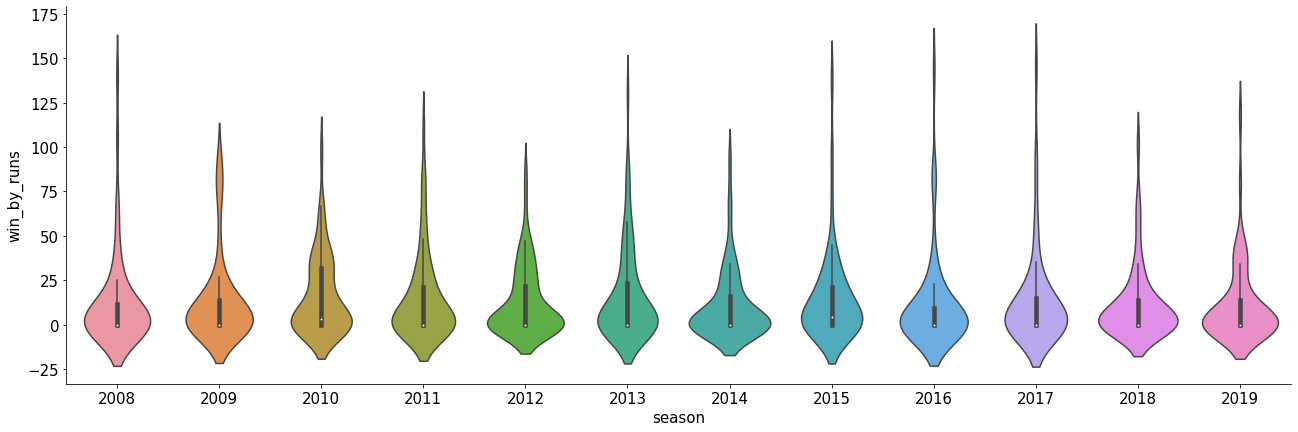

In [36]:
sns.catplot(x='season', y='win_by_runs', data=matches, kind='violin', height=6, aspect=3)

## 2. Season wise win by wickets

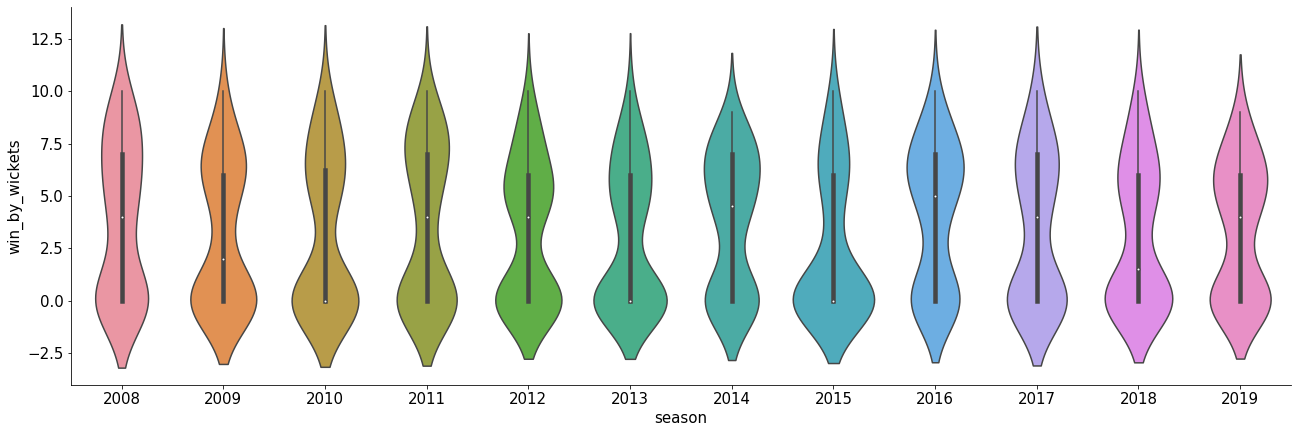

In [37]:
sns.catplot(x='season', y='win_by_wickets', data=matches, kind='violin', height=6, aspect=3)

# Ball by Ball Analysis

In [38]:
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## 1. Teams with their total runs and batsman runs

In [65]:
runs = deliveries.groupby('batting_team').sum()[['batsman_runs','total_runs']].sort_values('batsman_runs', ascending=False)
runs

,batsman_runs,total_runs
batting_team,,
Mumbai Indians,28164,29809
Royal Challengers Bangalore,26775,28126
Kings XI Punjab,26468,27893
Kolkata Knight Riders,25895,27419
Chennai Super Kings,25104,26418
Delhi Daredevils,23115,24388
Rajasthan Royals,21341,22431
Sunrisers Hyderabad,16250,17059
Deccan Chargers,10885,11463


In [66]:
runs.iplot(kind='bar')

## 2. Dismissal Kind

In [41]:
dis = deliveries['dismissal_kind'].value_counts().rename_axis('dismissal_kind').reset_index(name='number')
dis

,dismissal_kind,number
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


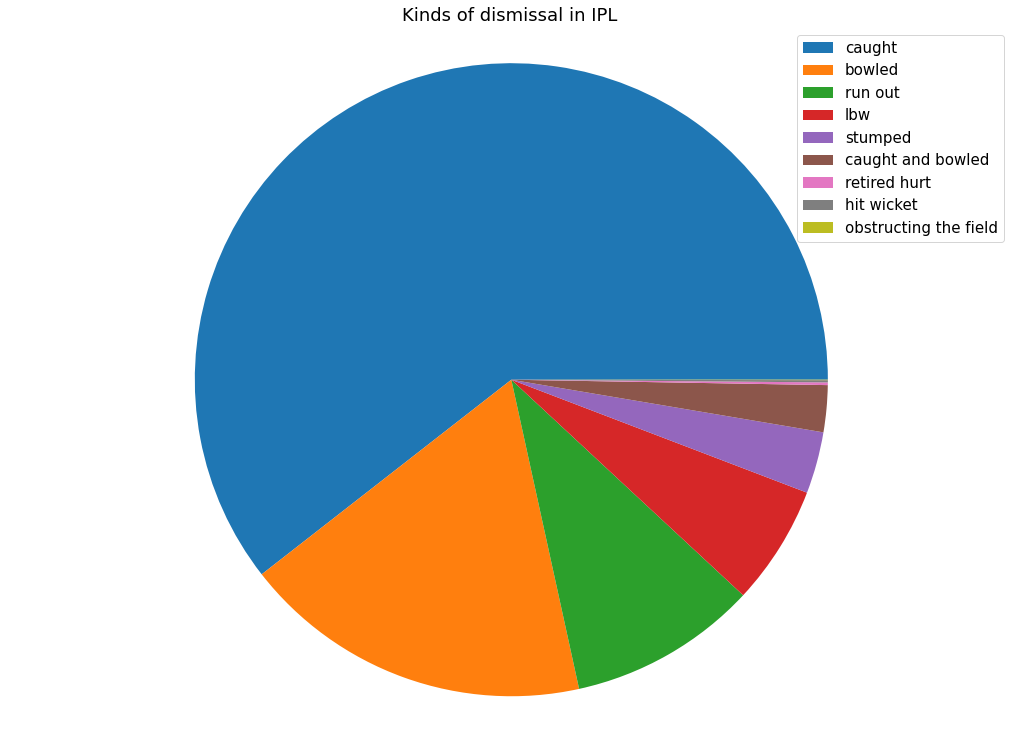

In [42]:
values = list(dis['number'])
plt.rcParams['font.size'] = 15
plt.figure(figsize=(18,13))
plt.pie(values, labels=None)
plt.title('Kinds of dismissal in IPL')
plt.axis('equal')
plt.legend(labels=dis['dismissal_kind'].unique())
plt.show()

## 3. Most Dismissals by a bowler in IPL (2008-2019) 

In [43]:
df = deliveries.query('dismissal_kind != ["run out","retired hurt", "obstructing the field","hit wicket"]')
dff = df[['dismissal_kind', 'bowler']].dropna()
bow = dff['bowler'].value_counts()[:10]

In [44]:
bow.iplot(kind='bar')

## 4. Most Individual Runs by a batsman in IPL (2008-2019)

In [45]:
#Top 10 highest scorers of IPL
x = deliveries[['batsman','batsman_runs']]
bat = x.groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False)[:10]

In [46]:
bat.iplot(kind='bar')

# SRH vs RCB head to head analysis (deliveries and matches data)

## 1. Wins and loss analysis

In [47]:
def get_srhrcb(team1,team2):
    teams = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore']
    if team1 in teams and team2 in teams:
        return True
    else: 
        return False

In [48]:
index = []
for row in matches.iterrows():
    index.append(get_srhrcb(row[1]['team1'], row[1]['team2']))
srhrcb = matches[index]
print("Total matches between RCB AND SRH: ", len(srhrcb))

Total matches between RCB AND SRH:  14


In [49]:
srhrcb['winner'].value_counts().iplot(kind='bar')

## 2. Toss Wins

In [50]:
toss = srhrcb['toss_winner'].value_counts().rename_axis('team').reset_index(name='toss_wins')
values = list(toss['toss_wins'])

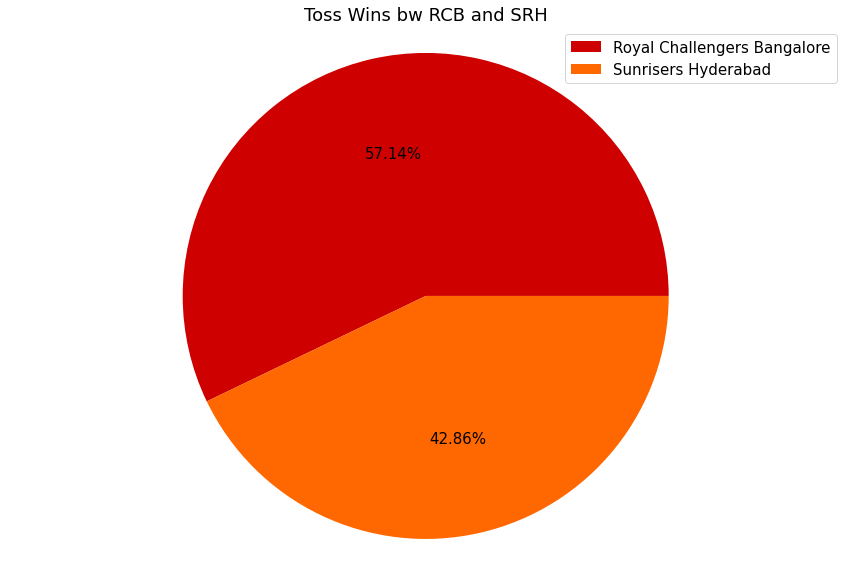

In [51]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(15,10))
plt.pie(values, labels=None, autopct='%.2f%%', colors=['#cf0000','#ff6701'])
plt.title('Toss Wins bw RCB and SRH',loc='center')
plt.axis('equal')
plt.legend(labels=toss['team'].unique())
plt.show()

## 3. Total Extra Runs

In [52]:
srhrcb_ball = deliveries.query('batting_team == ["Sunrisers Hyderabad", "Royal Challengers Bangalore"] and bowling_team == ["Sunrisers Hyderabad", "Royal Challengers Bangalore"]')
extras = srhrcb_ball.groupby('match_id').sum()[['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs', 'extra_runs']]
extras.insert(0,'match', np.arange(1,len(extras)+1, dtype='int'))
extras

,match,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
match_id,,,,,,,
1,1,9,0,2,2,0,13
388,2,13,1,10,1,0,25
432,3,8,0,1,1,0,10
481,4,10,0,4,1,0,15
503,5,7,3,4,0,0,14
525,6,21,0,9,2,0,32
568,7,4,0,2,2,0,8
580,8,13,1,3,1,0,18
603,9,5,1,1,1,0,8


 ## 4. Average Target Score

In [53]:
target = srhrcb_ball.groupby('batting_team').sum()['total_runs']
target[0] =  round(target[0]/len(srhrcb),0)
target[1] =  round(target[1]/len(srhrcb),0)
target.iplot('bar')

## 5. 4s and 6s between SRH and RCB

In [54]:
runs = srhrcb_ball.query('batsman_runs == [4,6]')

In [55]:
srh_runs = runs.query('batting_team == "Sunrisers Hyderabad"')['batsman_runs'].value_counts()
rcb_runs = runs.query('batting_team == "Royal Challengers Bangalore"')['batsman_runs'].value_counts()

In [56]:
data = {
    'team': ["Sunrises Hyderabad", "Royal Challengers Bangalore"],
    '4s': [srh_runs[4], rcb_runs[4]],
    '6s': [srh_runs[6], rcb_runs[6]]
}
table = pd.DataFrame(data,columns=['team','4s','6s'])
tab = table.set_index('team')
tab.iplot(kind='bar', title='4s and 6s between RCB and SRH')

## 6. Powerplay analysis of RCB vs SRH

In [57]:
srh_pow = srhrcb_ball.query('over<=6 and batting_team == "Sunrisers Hyderabad"').sum()['total_runs']
rcb_pow = srhrcb_ball.query('over<=6 and batting_team == "Royal Challengers Bangalore"').sum()['total_runs']

srh_pow_avg = srh_pow//len(srhrcb)
rcb_pow_avg = rcb_pow//len(srhrcb)
print("Total Powerplay score of RCB against SRH in",len(srhrcb),"matches =", rcb_pow)
print("Total Powerplay score of SRH against RCB in",len(srhrcb),"matches =", srh_pow)

Total Powerplay score of RCB against SRH in 14 matches = 687
Total Powerplay score of SRH against RCB in 14 matches = 760


In [58]:
srh_wicks = len(srhrcb_ball.query('over<=6 and bowling_team == "Sunrisers Hyderabad"')['dismissal_kind'].dropna())
rcb_wicks = len(srhrcb_ball.query('over<=6 and bowling_team == "Royal Challengers Bangalore"')['dismissal_kind'].dropna())

srh_wicks_avg = round(srh_wicks/len(srhrcb),0)
rcb_wicks_avg = round(rcb_wicks/len(srhrcb),0)
print("Total Powerplay wickets of RCB against SRH in",len(srhrcb),"matches =", rcb_wicks)
print("Total Powerplay wickets of SRH against RCB in",len(srhrcb),"matches =", srh_wicks)

Total Powerplay wickets of RCB against SRH in 14 matches = 13
Total Powerplay wickets of SRH against RCB in 14 matches = 24


In [59]:
pow_data = {
    'team': ["Sunrises Hyderabad", "Royal Challengers Bangalore"],
    'batting_score': [srh_pow_avg, rcb_pow_avg],
    'wickets_taken': [srh_wicks_avg, rcb_wicks_avg]
}
pow_table = pd.DataFrame(pow_data,columns=['team','batting_score','wickets_taken'])
pow_tab = pow_table.set_index('team')
pow_tab.iplot(kind='bar', title='Average batting score and wickets in powerplay')

## 7. Most Valuable Player

In [60]:
mvp = srhrcb['player_of_match'].value_counts()
mvp

DA Warner         3
AB de Villiers    3
V Kohli           2
GH Vihari         1
S Hetmyer         1
Yuvraj Singh      1
BCJ Cutting       1
J Bairstow        1
KS Williamson     1
Name: player_of_match, dtype: int64

In [61]:
mvp.iplot('bar')